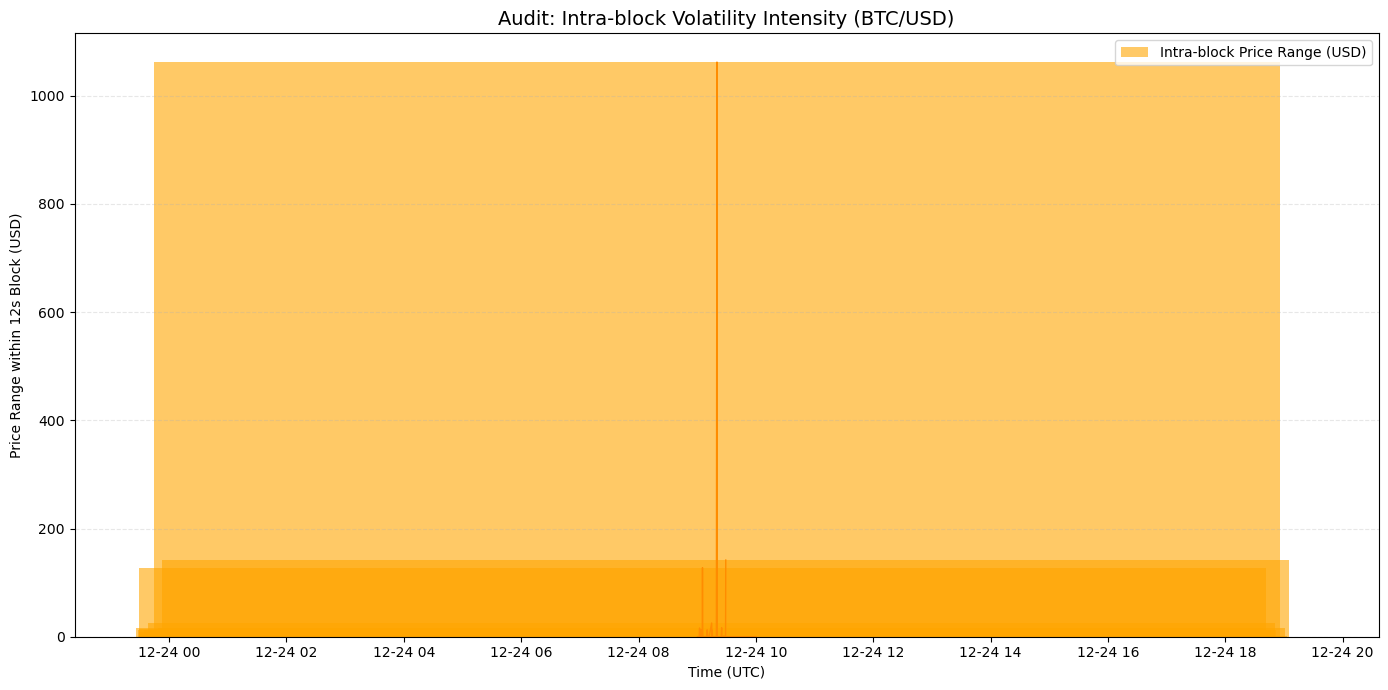

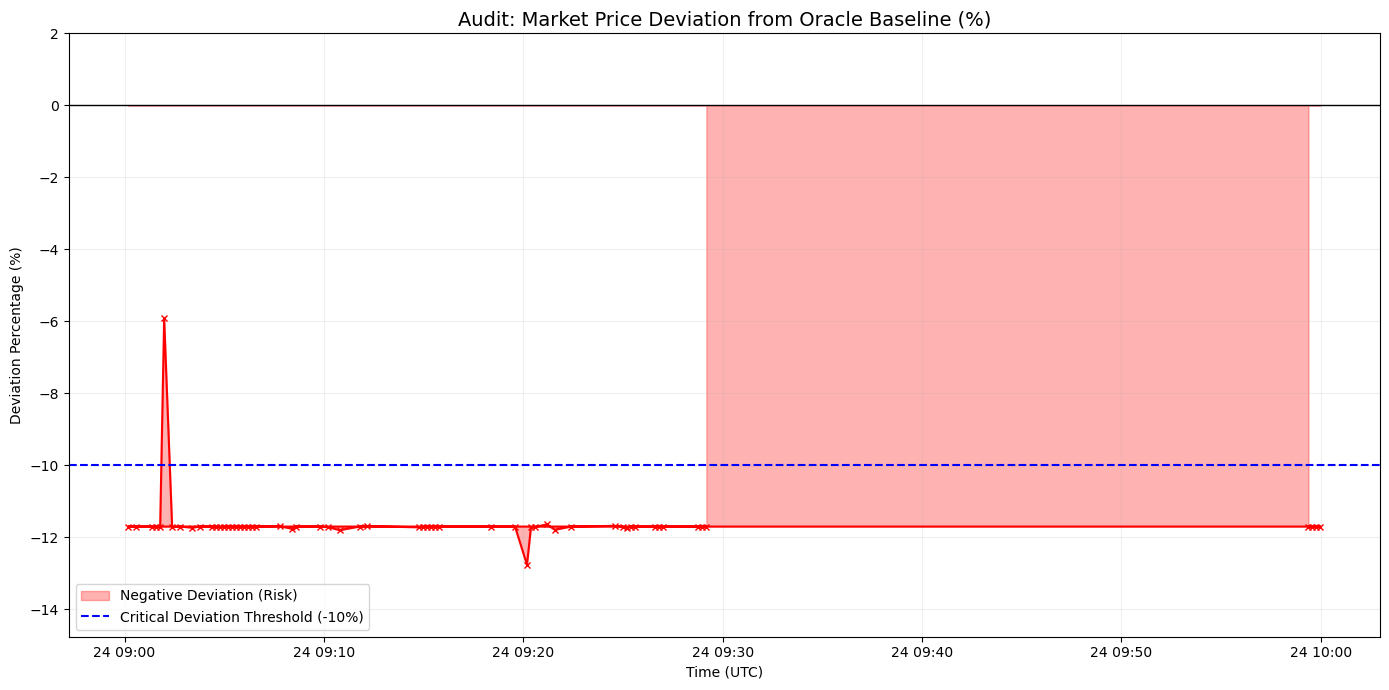

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load Sheet 6 ---
df_summary = pd.read_csv('Sheet6.csv')

# --- 2. Fix Excel Time Bug ---
def fix_excel_time(t):
    t = str(t).strip()
    # If Excel truncated it to MM:SS
    if len(t.split(':')) == 2:
        return f"2025-12-24 09:{t}"
    return f"2025-12-24 {t}"

df_summary['Block timestamp'] = pd.to_datetime(df_summary['Block timestamp'].apply(fix_excel_time))
df_summary = df_summary.sort_values('Block number')

# --- 3. Visualization: Price Volatility Intensity (The "Chaos" Gauge) ---
# Purpose: Show how wide the price swung within a single 12-second block.
plt.figure(figsize=(14, 7))
plt.bar(df_summary['Block timestamp'], df_summary['Price range'], color='orange', alpha=0.6, label='Intra-block Price Range (USD)')
plt.plot(df_summary['Block timestamp'], df_summary['Price range'], color='darkorange', linewidth=1)

plt.title('Audit: Intra-block Volatility Intensity (BTC/USD)', fontsize=14)
plt.xlabel('Time (UTC)')
plt.ylabel('Price Range within 12s Block (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --- 4. Visualization: Oracle Deviation % (The "Smoking Gun") ---
# Purpose: Directly characterize the "Basis Risk" that could trigger liquidations.
plt.figure(figsize=(14, 7))
plt.fill_between(df_summary['Block timestamp'], df_summary['Min price deviation pct'], 0, 
                 where=(df_summary['Min price deviation pct'] < 0), color='red', alpha=0.3, label='Negative Deviation (Risk)')

plt.plot(df_summary['Block timestamp'], df_summary['Min price deviation pct'], color='red', marker='x', markersize=4)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
# Mark the -10% risk threshold (common for DeFi stress testing)
plt.axhline(y=-10, color='blue', linestyle='--', label='Critical Deviation Threshold (-10%)')

plt.title('Audit: Market Price Deviation from Oracle Baseline (%)', fontsize=14)
plt.xlabel('Time (UTC)')
plt.ylabel('Deviation Percentage (%)')
plt.ylim(min(df_summary['Min price deviation pct']) - 2, 2)
plt.legend(loc='lower left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()